# k均值

## 聚类问题

无监督学习（unsupervised learning）中，训练样本的标记是未知的，我们可以通过对无标记训练样本的学习来揭示数据的内在性质及规律，为进一步的数据分析提供基础。常见的无监督学习有聚类（clustering）、密度估计（density estimation）和异常检测（anomaly detection）等。其中，聚类是研究最多、应用最广泛的无监督学习。

聚类试图将数据集中的样本划分为若干个通常是不相交的子集，每个子集称为一个“簇”（cluster）。

假定样本集 $D=\{ \boldsymbol{x}_1, \boldsymbol{x}_2, \ldots, \boldsymbol{x}_m \}$ 包含m个无标记样本，每个样本 $\boldsymbol{x}_i = (x_{i1}, x_{i2}, \ldots, x_{in}) $ 是一个n维特征向量，则聚类算法将样本集D划分为k个互不相交的簇 $\{C_l \mid l=1,2,\ldots,k\}$，其中 $C_{l} \cap_{l \neq l^{\prime}} C_{l^{\prime}} = \emptyset$ 且 $D=\cup_{l=1}^{k} C_l$。相应地，我们用 $\lambda_j \in {1, 2, \ldots, k}$ 表示样本 $\boldsymbol{x}_j$ 的簇标记（cluster label），即 $\boldsymbol{x}_j \in C_{\lambda_j}$。于是，聚类的结果可用包含m个元素的簇标记向量 $\boldsymbol{\lambda} = (\lambda_1, \lambda_2, \ldots, \lambda_m)$ 表示。



## k均值算法

给定样本集 $D=\{\boldsymbol{x}_1, \boldsymbol{x}_2, \ldots, \boldsymbol{x}_m\}$，k均值（k-means）算法针对聚类所得簇划分 $C = \{ C_1, C_2, \ldots, C_k \}$ 最小化平方误差：

$$ E = \sum_{i=1}^{k} \sum_{\boldsymbol{x} \in C_i} \left\| \boldsymbol{x} - \boldsymbol{\mu}_i \right\|_2^2 $$

其中 $\boldsymbol{\mu}_i = \frac{1}{\mid C_i \mid } \sum_{\boldsymbol{x} \in C_i} \boldsymbol{x} $ 是簇 $C_i$ 的均值向量。直观来看，上式在一定程度上刻画了簇内样本围绕簇均值向量的紧密程度，E值越小则簇内样本相似度越高。

最小化上式并不容易，找到它的最优解需考察样本集D所有可能的簇划分，这是一个NP难问题。因此，k均值算法采用了贪心策略，通过迭代优化来近似求解上式。算法的流程如下图所示，其中第1行对均值向量进行初始化，在第4-8行与第9-16行依次对当前簇划分及均值向量迭代更新，若迭代更新后聚类结果保持不变，则在第18行将当前簇划分结果返回。

<img src="./k-means.jpg" width="720" />

## Demo

来自于周志华老师《机器学习》的西瓜数据集如下：


In [77]:
import pandas as pd
import numpy as np
from collections import OrderedDict

data_dict = OrderedDict( (
        ('密度', [
                0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666, 0.243,
                0.245, 0.343, 0.639, 0.657, 0.360, 0.593, 0.719, 0.359, 0.339, 0.282,
                0.748, 0.714, 0.483, 0.478, 0.525, 0.751, 0.532, 0.473, 0.725, 0.446
            ]),
        ('含糖率', [
                0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091, 0.267,
                0.057, 0.099, 0.161, 0.198, 0.370, 0.042, 0.103, 0.188, 0.241, 0.257,
                0.232, 0.346, 0.312, 0.437, 0.369, 0.489, 0.472, 0.376, 0.445, 0.459
            ]),
    ) )

data = pd.DataFrame.from_dict(data_dict)
data

,密度,含糖率
0,0.697,0.460
1,0.774,0.376
2,0.634,0.264
3,0.608,0.318
4,0.556,0.215
5,0.403,0.237
6,0.481,0.149
7,0.437,0.211
8,0.666,0.091
9,0.243,0.267


假定聚类簇数k=3，算法开始时随机选取3个样本5、11、26作为初始均值向量，即 $\boldsymbol{\mu}_1 = \boldsymbol{x}_5$、$\boldsymbol{\mu}_2 = \boldsymbol{x}_{11}$、$\boldsymbol{\mu}_3 = \boldsymbol{x}_{26}$。

样本 $\boldsymbol{x}_0$ 与 $\boldsymbol{\mu}_1$、$\boldsymbol{\mu}_2$、$\boldsymbol{\mu}_3$ 的距离分别计算如下：

In [26]:
def distance(a, b):
    """ 计算两个样本点的距离
    """
    return np.linalg.norm(a - b)
    
print('x0与μ1的距离：%.3f' % distance(data.iloc[5, :], data.iloc[0, :]))
print('x0与μ2的距离：%.3f' % distance(data.iloc[11, :], data.iloc[0, :]))
print('x0与μ3的距离：%.3f' % distance(data.iloc[26, :], data.iloc[0, :]))

x0与μ1的距离：0.369
x0与μ2的距离：0.506
x0与μ3的距离：0.165


同样可以计算其他29个样本与三个均值向量的距离，然后将每个样本划分给离它最近的均值向量：

In [140]:
def partition(mus, data):
    """ 对所有样本点进行划分
    """
    c = {}
    for k in mus:
        c[k] = []
    
    for index, row in data.iterrows():
        d = np.infty
        cur_k = -1
        for k in mus:
            d2 = distance(row, mus[k])
            if d2 < d:
                d = d2
                cur_k = k
        c[cur_k].append(index)
    return c
        
mus = {0: data.iloc[5, :], 1: data.iloc[11, :], 2: data.iloc[26, :]}
clusters = partition(mus, data)
clusters

{0: [4, 5, 6, 7, 8, 9, 12, 13, 14, 16, 17, 18, 19, 22],
 1: [10, 11, 15],
 2: [0, 1, 2, 3, 20, 21, 23, 24, 25, 26, 27, 28, 29]}

绘制样本点，直观看看分类情况：

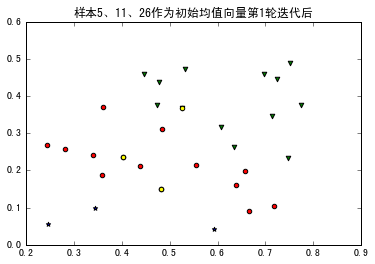

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

markers = ['o', '*', 'v']
colors = ['red', 'blue', 'green']
def plot_cluster(clusters, mus, t):
    """ 绘制划分情况
    """
    for i in clusters:
        for j in clusters[i]:
            plt.scatter(data.iloc[j, 0], data.iloc[j, 1], marker=markers[i], c=colors[i])
    for i in mus:
        plt.scatter(mus[i][0], mus[i][1], c='yellow')
    plt.title(t)
    plt.show()

plot_cluster(clusters, mus, '样本5、11、26作为初始均值向量第1轮迭代后')

通过上面得到的分组结果，可以计算出新的均值向量：

In [35]:
def new_mus(clusters):
    """ 根据划分得到的类别，计算新的均值向量
    """
    _mus = {}
    for k in clusters:
        _mus[k] = data.iloc[clusters[k], :].mean()
    return _mus
        
mus = new_mus(clusters)
mus

{1: 密度     0.473143
 含糖率    0.214286
 dtype: float64, 2: 密度     0.393667
 含糖率    0.066000
 dtype: float64, 3: 密度     0.623462
 含糖率    0.387923
 dtype: float64}

不断重复上述过程，直至结果收敛，就得到了聚类的结果。完整的代码如下：

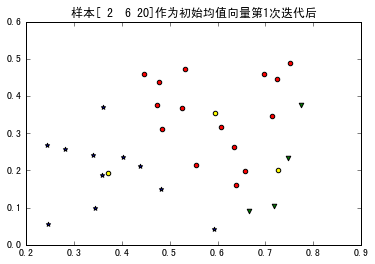

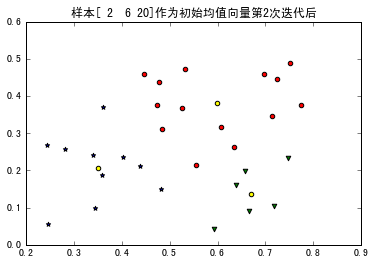

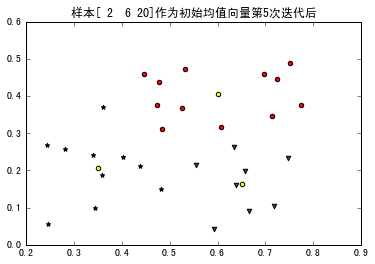

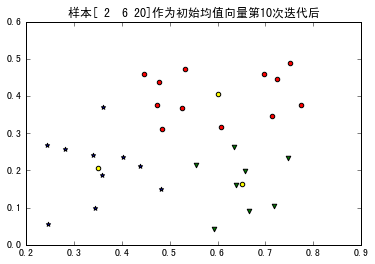

{0: [0, 1, 3, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 1: [5, 6, 7, 9, 10, 11, 14, 17, 18, 19],
 2: [2, 4, 8, 12, 13, 15, 16, 20]}

In [141]:
def k_means(mus, data, t):
    """ 简单的k均值聚类，写死聚类次数
    """
    for i in range(10):
        clusters = partition(mus, data)
        mus = new_mus(clusters)
        if i == 0 or i == 1 or i == 4 or i == 9:
            plot_cluster(clusters, mus, '%s第%s次迭代后' % (t, i+1))
    return clusters
    
k = 3 # 聚成3类

# 初始均值向量
mus = {}
init_ks = np.random.choice(len(data), k)
for i in range(3):
    mus[i] = data.iloc[init_ks[i], :]
    
# k均值聚类
k_means(mus, data, '样本%s作为初始均值向量' % (init_ks))